In [ ]:
!git clone https://github.com/jsebastianquiroga/tesis_mapeo_distribucion.git

In [1]:
import os

In [2]:
%run frontera_v3.ipynb

2023-04-25 04:54:00.794345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [30]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [31]:
X.shape

(600, 2)

In [32]:
y.shape

(600,)

In [97]:
X

array([[-0.31658683,  4.5708382 ],
       [ 1.64265316,  3.84306754],
       [ 0.8433895 ,  4.00599645],
       ...,
       [ 2.40704763,  1.27689919],
       [-2.15246105,  3.91001909],
       [ 1.90811845,  4.64375231]])

In [34]:
y

array([0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0,
       2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0,

In [9]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

# LSH

In [10]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41, method='LSH')

In [11]:
frontera.frontier()

In [12]:
frontera.centroids

{'Centroid Group: 0': array([-0.91185411,  1.86197894]),
 'Centroid Group: 1': array([-0.2628178 ,  3.34947535]),
 'Centroid Group: 3': array([1.04958733, 3.3039144 ]),
 'Centroid Group: 4': array([0.04011225, 1.31203996]),
 'Centroid Group: 6': array([1.69807289, 1.9275763 ]),
 'Centroid Group: 7': array([1.94662637, 3.46222774])}

In [13]:
frontera.plot_frontera_2D(0,1)

# Rob

In [14]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [15]:
frontera.frontier()

In [16]:
frontera.plot_frontera_2D(0,1)

In [17]:
frontera.plot_Vectors(0,1)

# Leo

In [18]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=10, N_points_frontera=41, method='prototypes')

In [19]:
frontera.frontier()

Restricted license - for non-production use only - expires 2024-10-28


In [20]:
frontera.plot_frontera_2D(0,1)

# MNIST

In [164]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Normalize the pixel values
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0]).T
# y_test_col = y_test.reshape(1, y_test.shape[0])

#train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))

In [179]:
# Fijamos una semilla para el generador de números aleatorios
semilla = 42

# Creamos un objeto generador de números aleatorios con la semilla fijada
rng = np.random.RandomState(semilla)

# Generamos una permutación aleatoria de los índices de ambos arrays
indices_perm = rng.permutation(1000)

# Obtenemos las muestras aleatorias utilizando los índices permutados
muestra_array1 = x_train_flat[indices_perm]
muestra_array2 = y_train_col[indices_perm]

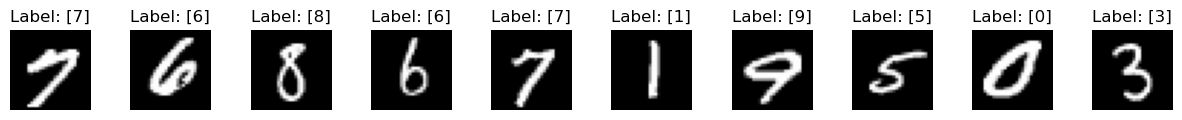

In [180]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    axes = axes.ravel()

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}", fontsize=12)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Display first 10 filtered images from the training set
display_images(muestra_array1, muestra_array2)
plt.show()

In [190]:
#muestra_array2 = muestra_array2.reshape(1,-1)
print(muestra_array1.shape)
print(muestra_array2.shape)

(1000, 784)
(1000, 1)


In [185]:
%run frontera_v3.ipynb
frontera = Frontera(muestra_array1,muestra_array2,percentil_min=5, percentil_max=25, N_points_frontera=41)

In [186]:
frontera.frontier()

In [202]:
frontera.plot_muestra_2D( int(600/2),int(600/2+1) )

In [203]:
frontera.plot_frontera_2D( int(600/2),int(600/2+1) )

In [189]:
frontera.plot_UMAP()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### prototypes

In [ ]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()